In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class LRTAStar:
    def __init__(self, start, goal, neighbors, heuristic):
        self.start = start
        self.goal = goal
        self.neighbors = neighbors
        self.heuristic = heuristic
        self.H = {start: heuristic(start)}  # Heuristic values
        
    def update_heuristic(self, current, next_node):
        cost = 1 
        self.H[current] = min(self.H.get(current, float('inf')),
                              cost + self.H.get(next_node, float('inf')))

    def lrta_star(self):
        current = self.start
        path = [current]
        
        while current != self.goal:
            if current not in self.H:
                self.H[current] = self.heuristic(current)
            
            # Look at neighbors and choose the best move
            next_node = min(self.neighbors(current), 
                            key=lambda n: self.H.get(n, self.heuristic(n)))
            
            # Update heuristic value of the current node
            self.update_heuristic(current, next_node)
            
            # Move to the next node
            current = next_node
            path.append(current)
        
        return path

In [14]:
# Graph representation
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'E'],
    'C': ['D', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['B', 'D']
}

# Neighbors function
def neighbors(node):
    return graph.get(node, [])

# Heuristic function (Manhattan distance-like values)
def heuristic(node):
    h_values = {'A': 5, 'B': 4, 'C': 3, 'D': 6, 'E': 2, 'F': 0}
    return h_values.get(node, float('inf'))

# Running the LRTA* algorithm
lrta = LRTAStar(start='A', goal='F', neighbors=neighbors, heuristic=heuristic)
path = lrta.lrta_star()
print("Path:", path)

Path: ['A', 'C', 'F']


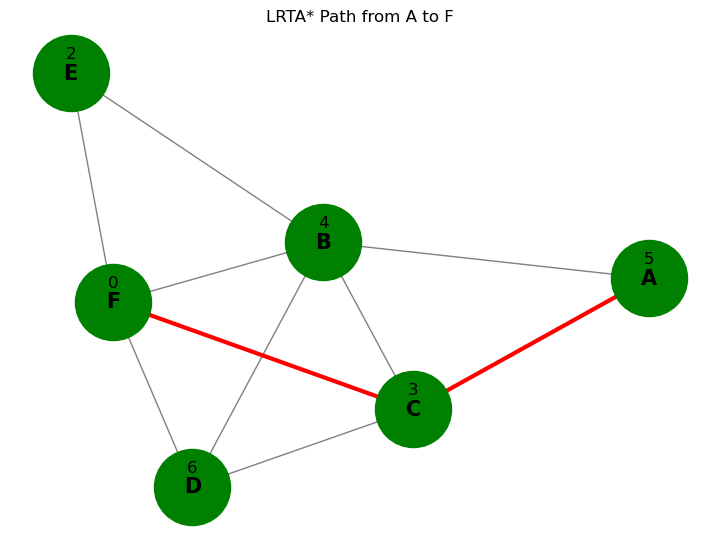

In [15]:
# Plotting the graph and the path
G = nx.Graph()

# Add edges to the graph
for node, neighbors_list in graph.items():
    for neighbor in neighbors_list:
        G.add_edge(node, neighbor)

# Positions for the nodes in the graph
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(7, 5))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='g', font_size=15, font_weight='bold', edge_color='gray')

# Highlight the path
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=3)

for node, (x, y) in pos.items():
    h_values = {'A': 5, 'B': 4, 'C': 3, 'D': 6, 'E': 2, 'F': 0}
    plt.text(x, y + 0.05, f"{h_values[node]}", fontsize=12, ha='center', color='black')

# Show the plot
plt.title(f"LRTA* Path from {lrta.start} to {lrta.goal}")
plt.show()